In [ ]:
import pandas as pd
import numpy as np

# load the data
df = pd.read_csv('/water_potability.csv')


In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

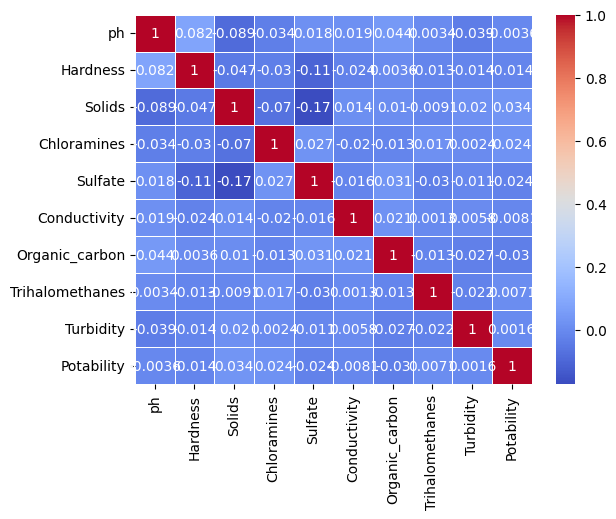

In [ ]:
import pandas as pd
import seaborn as sns

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the correlation matrix using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=.5)


In [ ]:
# calculate the null percentages
null_percentages = df.isnull().sum() / len(df) * 100

print(null_percentages)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the features and target variable
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']]
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6669034090909091


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM classifier
clf = svm.SVC(kernel='linear')

# Fit the training data to the classifier
clf.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.5781637717121588


In [ ]:
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by feature importance score in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)


           feature  importance
4          Sulfate    0.150455
0               ph    0.139098
3      Chloramines    0.117112
2           Solids    0.113852
1         Hardness    0.113760
7  Trihalomethanes    0.094511
6   Organic_carbon    0.092591
8        Turbidity    0.089560
5     Conductivity    0.089062


In [ ]:
X = df[['Sulfate', 'ph', 'Chloramines', 'Solids', 'Hardness', 'Trihalomethanes']]
y = df['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the hyperparameters to search
params = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy:  0.695265184497204


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the logistic regression model
model = LogisticRegression()

# train the model on the training data
model.fit(X_train, y_train)

# predict the target variable for the test data
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.5732009925558312


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter space for each algorithm
param_space = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [2, 4, 6]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 6]},
    'KNN': {'n_neighbors': [3, 5, 7]}
}

# define the algorithms to try
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# perform a grid search for each algorithm
for algorithm_name, algorithm in algorithms.items():
    print('Testing', algorithm_name)
    grid_search = GridSearchCV(algorithm, param_space[algorithm_name], cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Best Parameters:', grid_search.best_params_)
    print('Accuracy:', accuracy)
    print('-' * 50)


Testing Logistic Regression


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 0.1}
Accuracy: 0.5732009925558312
--------------------------------------------------
Testing Decision Tree
Best Parameters: {'max_depth': 4}
Accuracy: 0.6327543424317618
--------------------------------------------------
Testing Random Forest
Best Parameters: {'max_depth': 6, 'n_estimators': 100}
Accuracy: 0.6501240694789082
--------------------------------------------------
Testing KNN
Best Parameters: {'n_neighbors': 7}
Accuracy: 0.5459057071960298
--------------------------------------------------
